# Module 8 Group 25 Visualization of Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import cv2
import os
import numpy as np
import math

In [15]:
imgdir = '/content/drive/MyDrive/chest_xray/'
data_gen = ImageDataGenerator(rescale=1.0/255)
img_size = 150
batch_size = 150

In [16]:
# Read the images in the training set
train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['NORMAL', 'PNEUMONIA'],
        seed=12345,
        shuffle=True)

Found 5216 images belonging to 2 classes.


In [5]:
# Read the images in the validation set
val_generator = data_gen.flow_from_directory(
        imgdir + '/val',
        target_size=(img_size, img_size),
        batch_size=1,
        class_mode='binary',
        classes=['NORMAL', 'PNEUMONIA'],
        seed=12345,
        shuffle=True)

Found 16 images belonging to 2 classes.


In [6]:
# Read the images in the test set
test_generator = data_gen.flow_from_directory(
        imgdir + '/test',
        target_size=(img_size, img_size),
        batch_size=1,
        class_mode= 'binary',
        classes=['NORMAL', 'PNEUMONIA']
        #seed=12345,
        #shuffle=True
        )

Found 624 images belonging to 2 classes.


# Data Visualization and analysis

In [23]:
train_x, train_y = train_generator.next()

In [ ]:
plt.imshow(train_x[4], cmap = 'gray')
print('Normal') if train_y[4]== 0 else print("Pneumonia")

- check distribution of labels
- examples of postivie and nagative respectively
- observations from the data + information about the diesease
- feature importance

## I. Label Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Normal:  1341
Number of Penumonia :  3875


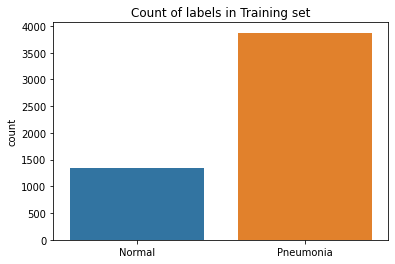

In [7]:
train_labels = []
unique_counts = np.unique(train_generator.labels, return_counts=True)
for i in range(len(train_generator.labels)):
    if(train_generator.labels[i] == 1):
        train_labels.append("Pneumonia")
    else:
        train_labels.append("Normal")
fig , ax = plt.subplots(figsize=(6,4))
#sns.set_style('darkgrid')
sns.countplot(train_labels)
num_of_n, num_of_p = unique_counts[1]
plt.title("Count of labels in Training set")
fig.show()
print('Number of Normal: ', num_of_n)
print('Number of Penumonia : ', num_of_p)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of Normal:  234
Number of Penumonia :  390


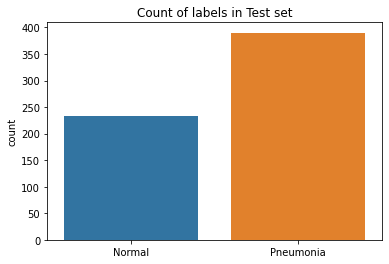

In [8]:
test_labels = []
unique_counts = np.unique(test_generator.labels, return_counts=True)
for i in range(len(test_generator.labels)):
    if(test_generator.labels[i] == 1):
        test_labels.append("Pneumonia")
    else:
        test_labels.append("Normal")
fig , ax = plt.subplots(figsize=(6,4))
#sns.set_style('darkgrid')
sns.countplot(test_labels)
N, P = unique_counts[1]
plt.title("Count of labels in Test set")
print('Number of Normal: ',N)
print('Number of Penumonia : ',P)

examples of postivie and nagative respectively

## II. Examples of each class

In [25]:
pos_idx = []
neg_idx = []
for i in range(len(train_x)):
    if(train_y[i] == 1):
        pos_idx.append(i)
    else:
        neg_idx.append(i)

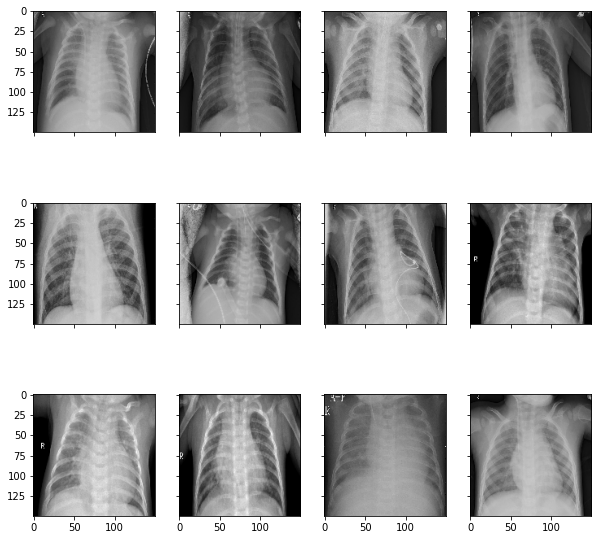

In [44]:
# Visualize positive examples
f, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 10))
k = 0
for i in range(3):
  for j in range(4):
    idx = pos_idx[k]
    #axs[i, j].imshow(train_x[idx], cmap = 'gray')
    axs[i, j].imshow(train_x[idx])
    k+=1

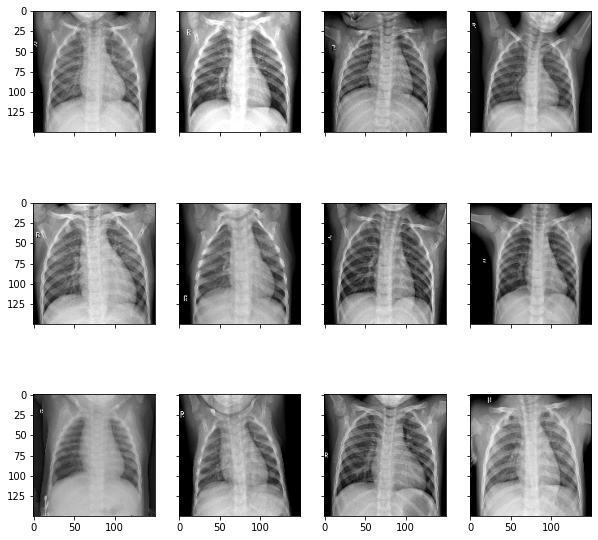

In [45]:
# Visualize negative examples
f, axs = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 10))
k = 0
for i in range(3):
  for j in range(4):
    idx = neg_idx[k]
    axs[i, j].imshow(train_x[idx], cmap = 'gray')
    k+=1